#                             Heart Disease Diagnostic Analysis

In [ ]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
#Extracting CSV Dataset From System using Pandas Library            

data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#All Columns in the Dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [ ]:
#Checking NULL Values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

###### There is NO MISSING Values in our Dataset

## Percentage of people having Heart Disease

In [ ]:
target=data.groupby('target').size()
target

target
0    138
1    165
dtype: int64

In [ ]:
#Converting Numerical Data into Categorical Data

def heart_disease(row):
    if row==0:
        return 'Absence'
    elif row==1:
        return 'Presence'

In [ ]:
#Applying converted data into our dataset with new column - Heart_Disease

data['Heart_Disease']=data['target'].apply(heart_disease)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence


In [ ]:
hd=data.groupby('Heart_Disease')['target'].count()
hd

Heart_Disease
Absence     138
Presence    165
Name: target, dtype: int64

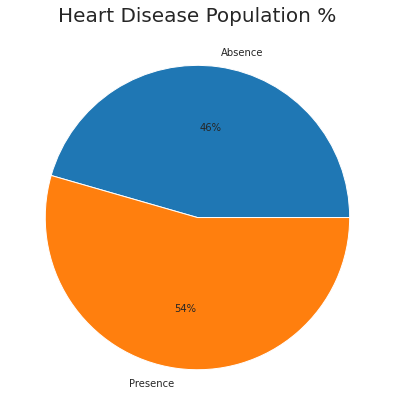

In [ ]:
#Pie Chart Creation of Heart Disease Population % using MatplotLib

plt.figure(figsize=(10,7))
plt.pie(hd, labels=['Absence','Presence'], autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize=20)
plt.show()

###### From the overall population, people having heart disease (46%) are lesser than those who have heart disease(56%)

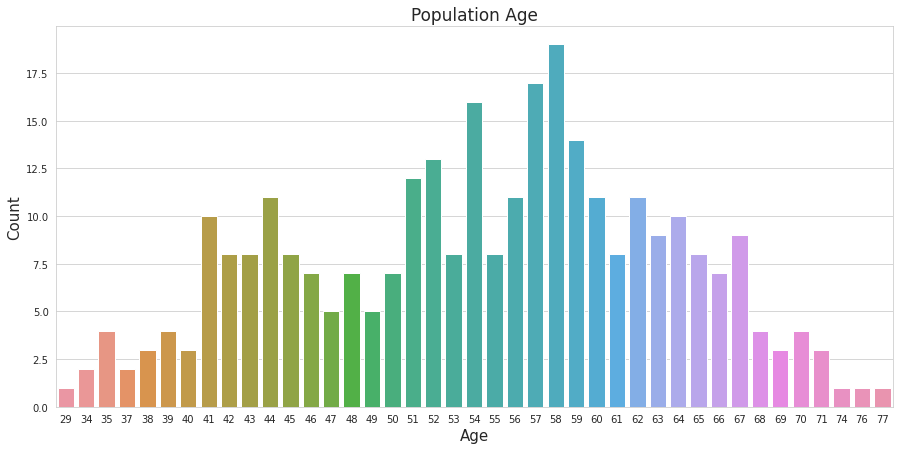

In [ ]:
#Countplot Creation of Population Age using MatplotLib and Seaborn

plt.figure(figsize=(15,7))
sns.countplot(x='age', data=data)
plt.title('Population Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

###### -> In this section, the best analysis can be divided into the elderly,middle-aged, young people by looking at the age ranges.

In [ ]:
#Statistical Analysis

Min_Age=data['age'].min()
Max_Age=data['age'].max()
Mean_Age=data['age'].mean()
print("Minimum Age =",Min_Age)
print("Maximum Age =",Max_Age)
print("Mean Age =",Mean_Age)

Minimum Age = 29
Maximum Age = 77
Mean Age = 54.366336633663366


In [ ]:
#Categorical Analysis

Young_Ages=data[(data['age']>=29) & (data['age']<40)]
Middle_Ages=data[(data['age']>=40) & (data['age']<55)]
Elderly_Ages=data[(data['age']>55)]
print('Young Ages =',len(Young_Ages))
print('Middle Ages =',len(Middle_Ages))
print('Elderly Ages =',len(Elderly_Ages))

Young Ages = 16
Middle Ages = 128
Elderly Ages = 151


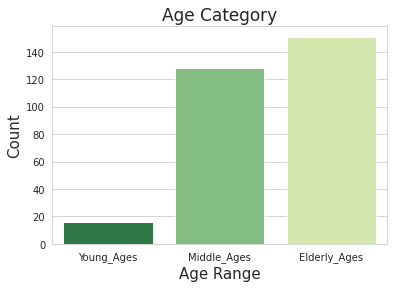

In [ ]:
#Bar Plot Creation of Age Category using MatplotLib and Seaborn

sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='YlGn_r')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [ ]:
#Converting Numerical Data into Categorical Data.

def gender(row):
    if row==1:
        return 'Male'
    elif row==0:
        return 'Female'

In [ ]:
#Applying converted data into our dataset with new column - sex1

data['sex1']=data['sex'].apply(gender)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female


In [ ]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young Age'
    elif row>=40 and row<55:
        return 'Middle Age'
    elif row>55:
        return 'Elder Age'

In [ ]:
#Applying converted data into our dataset with new column - Age_Range

data['Age_Range']=data['age'].apply(age_range)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female,Elder Age


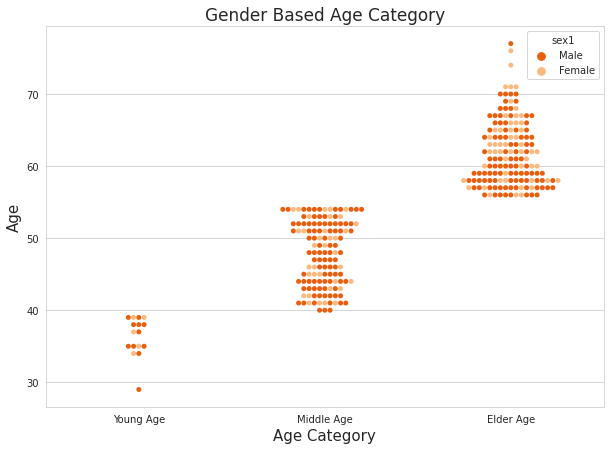

In [ ]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn

plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range', y='age', hue='sex1', data=data, order=['Young Age','Middle Age','Elder Age'], palette='Oranges_r')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

###### -> In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

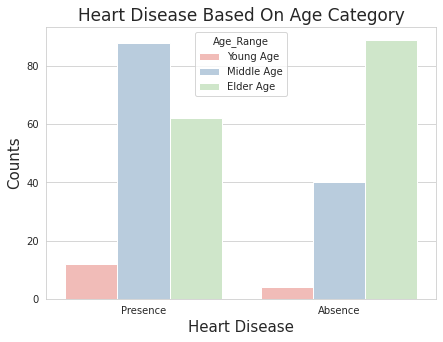

In [ ]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
hue_order=['Young Age', 'Middle Age', 'Elder Age']
sns.countplot(x='Heart_Disease', hue='Age_Range', data=data, order=['Presence','Absence'], hue_order=hue_order, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.show()

###### -> Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease

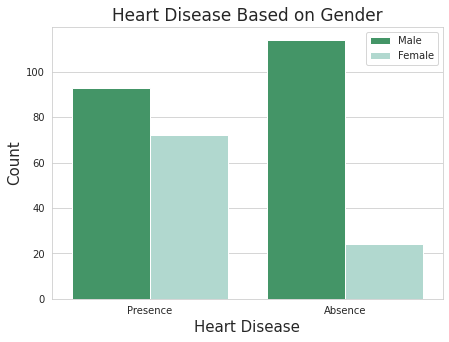

In [ ]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
sns.countplot(x=data['Heart_Disease'], hue='sex1', data=data, palette='BuGn_r')
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(labels=['Male','Female'])
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.show()

###### -> We can see that Males are more prone to Heart Disease

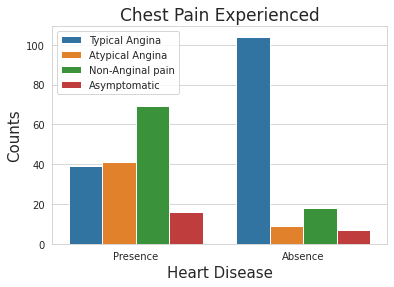

In [ ]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=data['Heart_Disease'], hue='cp', data=data, order=['Presence','Absence'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> It seems people having asymptomatic chest pain have a higher chance of heart disease

###### -> Asymptomatic Chest pain means neither causing nor exhibiting symptoms of Heart disease.

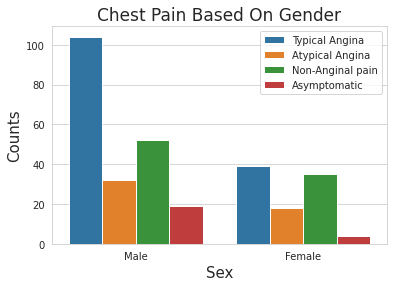

In [ ]:
#Count Plot Creation of Chest Pain Based On Gender using MatplotLib and Seaborn

sns.countplot(x=data['sex1'], hue='cp', data=data)
plt.title('Chest Pain Based On Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> We can see that a higher number of men are suffering from Asymptomatic type of Chest Pain

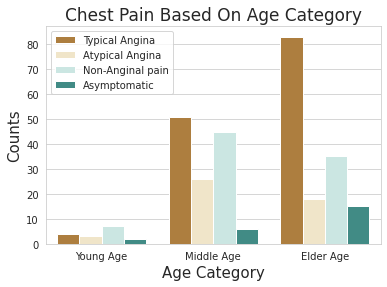

In [ ]:
#Count Plot Creation of Chest Pain Based On Age Category using MatplotLib and Seaborn

sns.countplot(x=data['Age_Range'], hue='cp', data=data, order=['Young Age', 'Middle Age', 'Elder Age'], palette='BrBG')
plt.title('Chest Pain Based On Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non-Anginal pain','Asymptomatic'])
plt.show()

###### -> There is very high number of Asymptomatic Pain in Elderly age Category

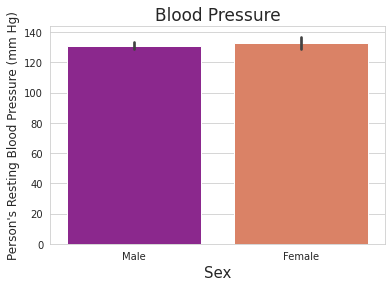

In [ ]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x='sex1', y='trestbps', data=data, palette='plasma')
plt.title("Blood Pressure", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=12)
plt.show()

###### -> Blood Pressure Rate is almost equal in Males and Females

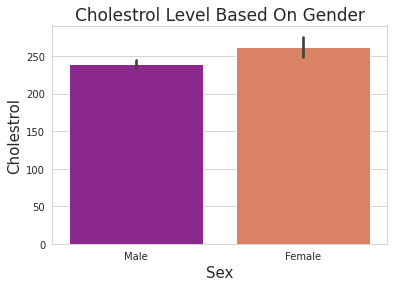

In [ ]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='chol', data=data, palette='plasma')
plt.title("Cholestrol Level Based On Gender", fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

In [ ]:
data['trestbps'].mean()

131.62376237623764

###### -> females have little bit of higher cholesterol than males

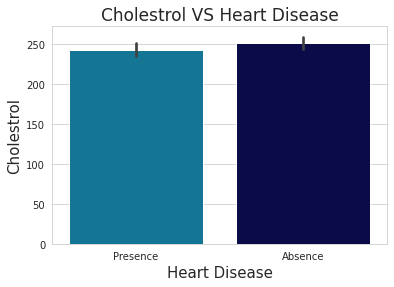

In [ ]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='chol', data=data, palette='ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Higher Cholestrol Level results Chances Of Heart Disease

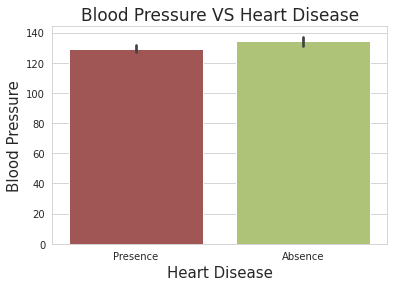

In [ ]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='trestbps', data=data, palette='tab20b_r')
plt.title('Blood Pressure VS Heart Disease', fontsize=17)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

###### -> Higher Blood Pressure Level results Chances Of Heart Disease

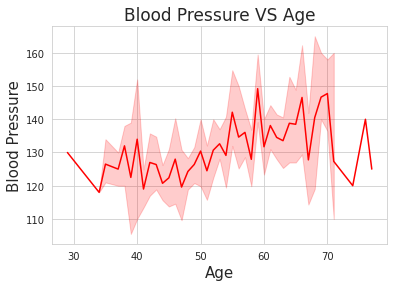

In [ ]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='trestbps', data=data, color='r')
plt.title('Blood Pressure VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

###### -> Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

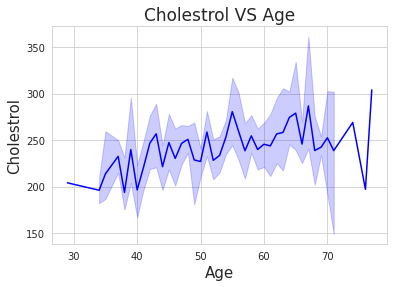

In [ ]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='chol', data=data, color='b')
plt.title('Cholestrol VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

###### -> Similarly Cholestrol Increasing in the age group of 50-60

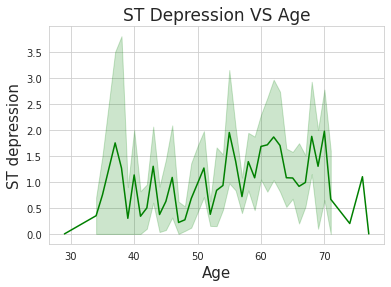

In [ ]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x='age', y='oldpeak', data=data, color='g')
plt.title('ST Depression VS Age', fontsize=17)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

###### -> we can observe from here that ST depression mostly increases bw the age group of 30-40

###### -> ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

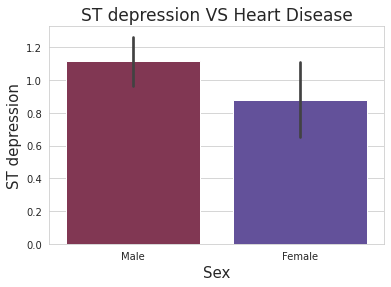

In [ ]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='sex1', y='oldpeak', data=data, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

###### -> More Males are prone to ST depression as compare to females

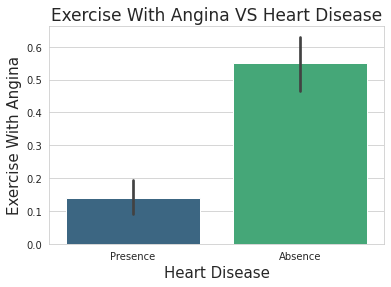

In [ ]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x='Heart_Disease', y='exang', data=data, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=17)      
plt.xlabel('Heart Disease', fontsize=15)                           
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()                                                              

###### -> If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

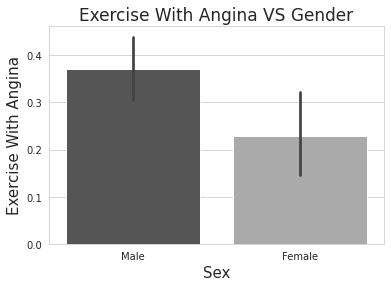

In [ ]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn

sns.barplot(x='sex1', y='exang', data=data, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

###### -> Males have have high Exercise Angina

###### -> A type of chest pain caused by reduced blood flow to the heart.

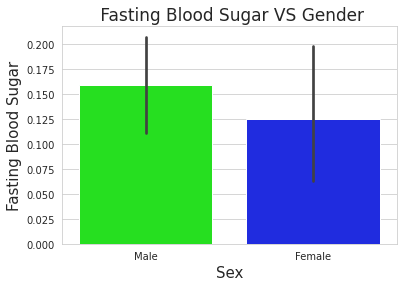

In [ ]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=data, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

###### -> Males have high no of Fasting Blood Sugar over 120

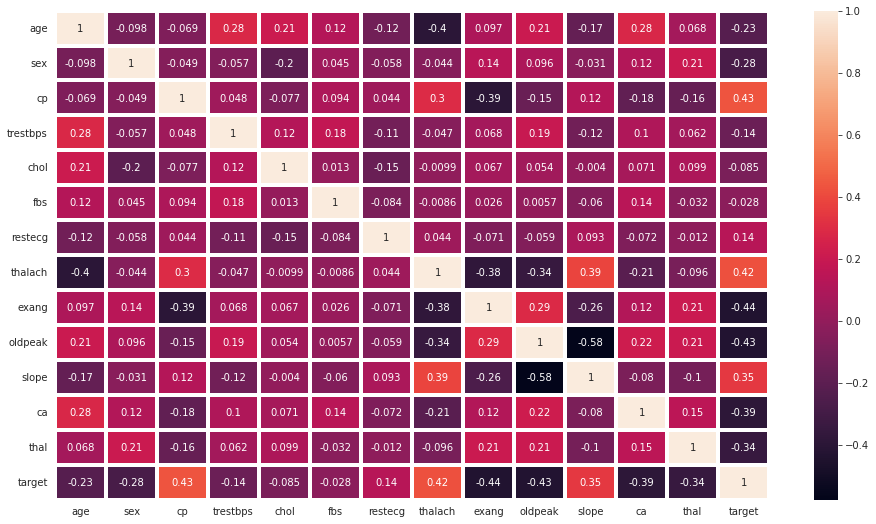

In [ ]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(data.corr(), annot=True, linewidth=3)                      

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male,Elder Age
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male,Young Age
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female,Middle Age
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male,Elder Age
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female,Elder Age
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Absence,Female,Elder Age
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Absence,Male,Middle Age
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Absence,Male,Elder Age
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Absence,Male,Elder Age


In [ ]:
data['Age_Range'] = data['Age_Range'].replace(['Young Age','Middle Age','Elder Age'],[0,1,2])

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Heart_Disease,sex1,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Presence,Male,2.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Presence,Male,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Presence,Female,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Presence,Male,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Presence,Female,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,Absence,Female,2.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,Absence,Male,1.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,Absence,Male,2.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,Absence,Male,2.0


In [ ]:
data.drop(['Heart_Disease','sex1'],inplace=True,axis=1)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2.0


In [ ]:
data.rename(columns = {'num':'Heart_Disease'}, inplace = True)

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,2.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,1.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,2.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,2.0


In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

NameError: ignored

In [ ]:
X_train.isnull().sum()

In [ ]:
X_train['Age_Range'].isna()

In [ ]:
X_train.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [ ]:
accuracies={}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

acc=accuracy_score(y_test,y_pred)
accuracies['Logistic Regression']=acc*100
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred))

print("Classification Report",classification_report(y_test,y_pred))  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = lr.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()                                                             

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report                   
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)

y_pred1 = knn.predict(X_test)

acc1=accuracy_score(y_test,y_pred)
accuracies['KNeighborsClassifier']=acc1*100

accuracy_score(y_train,knn.predict(X_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred1)*100,"%")

In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred1))

print("Classification Report",classification_report(y_test,y_pred1))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred1)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = knn.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for knc')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report                      

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred3 = dtc.predict(X_test)
acc3=accuracy_score(y_test,y_pred)                                    
accuracies['DecisionTreeClassifier']=acc3*100                         

accuracy_score(y_train,dtc.predict(X_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred3)*100,"%")

In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred3))

print("Classification Report",classification_report(y_test,y_pred3))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred3)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = dtc.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rfc = RandomForestClassifier( max_depth =5,n_estimators = 100)
rfc.fit(X_train, y_train)

y_pred5 = rfc.predict(X_test)


acc5=accuracy_score(y_test,y_pred5)
accuracies['RandomForestClassifier']=acc5*100


accuracy_score(y_train,rfc.predict(X_train))
print("Accuracy score of the model is:",accuracy_score(y_test,y_pred5)*100,"%")

In [ ]:
print("Confusion matrix of the model",confusion_matrix(y_test,y_pred5))

print("Classification Report",classification_report(y_test,y_pred5))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred5)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = rfc.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()                            

In [ ]:
colors = ["purple", "green", "magenta","blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()